Q1. Explain the concept of precision and recall in the context of classification models.

Precision and recall are two key metrics used to evaluate the performance of classification models, especially in situations where the classes are imbalanced. Here’s what each term means:

### Precision
- **Definition**: Precision measures the accuracy of the positive predictions made by the model. It is the ratio of true positive predictions to the total number of positive predictions made (both true positives and false positives).
- **Formula**:
  \[
  \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
  \]
- **Interpretation**: High precision indicates that when the model predicts a positive class, it is often correct. It is useful when the cost of false positives is high. For example, in medical testing, precision is important if you want to ensure that a positive diagnosis is correct before proceeding with treatment.

### Recall
- **Definition**: Recall measures the ability of the model to identify all relevant positive cases. It is the ratio of true positive predictions to the total number of actual positives (both true positives and false negatives).
- **Formula**:
  \[
  \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
  \]
- **Interpretation**: High recall means that the model is good at identifying positive cases and missing fewer of them. It is useful when the cost of false negatives is high. For instance, in disease screening, high recall ensures that most cases of the disease are detected, even if it means having some false alarms.

### Trade-Off
Precision and recall are often in tension with each other: increasing one can lead to a decrease in the other. The balance between precision and recall can be managed using the F1 score, which is the harmonic mean of the two. The F1 score is particularly useful when you need a single metric to assess performance and there is a trade-off between precision and recall.

In summary:
- **Precision** answers the question: Of all the positive predictions made, how many were actually correct?
- **Recall** answers the question: Of all the actual positives, how many were correctly identified by the model?

##Python Program Example


In [1]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], flip_y=0.1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Example output may vary depending on the classifier and dataset


Confusion Matrix:
[[264   6]
 [ 17  13]]
Precision: 0.68
Recall: 0.43


Q2. What is the F1 score and how is it calculated? How is it different from precision and recall?

The F1 score is a metric used to evaluate the performance of a classification model, especially when dealing with imbalanced classes. It provides a balance between precision and recall, making it useful in scenarios where one metric alone might be misleading.

### Calculation of F1 Score

The F1 score is the harmonic mean of precision and recall. It is calculated using the following formula:

\[ \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \]

Where:
- **Precision** is the ratio of true positive predictions to the total number of positive predictions (i.e., true positives + false positives).
- **Recall** (or Sensitivity) is the ratio of true positive predictions to the total number of actual positive instances (i.e., true positives + false negatives).

### Definitions

- **Precision**: Measures how many of the predicted positive cases are actually positive.
  \[ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} \]

- **Recall**: Measures how many of the actual positive cases are correctly identified.
  \[ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} \]

### Differences

- **Precision** focuses on the accuracy of positive predictions. A high precision means that when the model predicts positive, it is often correct.
- **Recall** focuses on the model's ability to identify all relevant positive instances. A high recall means the model is capturing most of the actual positives.

The F1 score combines these two metrics into a single value. It is particularly useful when you need a balance between precision and recall, and you have an imbalanced dataset where one metric alone might not adequately represent the model's performance.

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score


In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target


In [4]:
# For simplicity, we'll convert this to a binary classification problem
# We will classify only two classes: class 0 vs class 1
# We will classify only two classes: class 0 vs class 1
y_binary = (y == 0).astype(int)  # True if class 0, False otherwise


In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)


In [6]:
# Train a RandomForest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)


RandomForestClassifier()

In [7]:
# Make predictions on the test set
y_pred = clf.predict(X_test)


In [8]:
# Calculate Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [9]:
# Print results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 1.00
Recall: 1.00
F1 Score: 1.00


Q3. What is ROC and AUC, and how are they used to evaluate the performance of classification models?

ROC (Receiver Operating Characteristic) and AUC (Area Under the Curve) are important metrics for evaluating the performance of classification models, especially when dealing with imbalanced datasets.

### ROC Curve

- **Definition**: The ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier as its discrimination threshold is varied.
- **Axes**:
  - **True Positive Rate (TPR)**, also known as Sensitivity or Recall, is plotted on the Y-axis.
  - **False Positive Rate (FPR)** is plotted on the X-axis.
- **Purpose**: It shows the trade-off between sensitivity and specificity (or TPR and FPR). The curve helps visualize the performance of a model across different thresholds.

### AUC (Area Under the Curve)

- **Definition**: The AUC is the area under the ROC curve. It provides a single scalar value to summarize the performance of a classifier.
- **Interpretation**:
  - **AUC = 1**: Perfect model (no false positives or false negatives).
  - **AUC = 0.5**: Model with no discrimination ability (random guessing).
  - **0.5 < AUC < 1**: The model has some discriminatory ability.

### How They Are Used

1. **Model Comparison**: ROC and AUC are often used to compare the performance of different classification models. A model with a higher AUC is generally considered better.

2. **Threshold Selection**: The ROC curve helps in choosing an optimal threshold for the classifier by analyzing the trade-offs between TPR and FPR at different thresholds.

3. **Imbalanced Datasets**: AUC is particularly useful for evaluating models on imbalanced datasets, where the number of positive and negative instances is not equal.

Overall, ROC and AUC provide a comprehensive view of a classifier's performance, especially in scenarios where classes are imbalanced or when you need to understand the trade-offs between different types of classification errors.

Q4. How do you choose the best metric to evaluate the performance of a classification model?
What is multiclass classification and how is it different from binary classification?

Certainly! Let's explore both topics:

1. **Choosing Evaluation Metrics for Classification Models:**
    - Evaluating the performance of a classification model involves selecting appropriate metrics that provide insights beyond simple accuracy.
    - Here are some common evaluation metrics for classification models:

        - **Accuracy**: Measures how often the classifier correctly predicts. It's the ratio of correct predictions to the total number of predictions. However, accuracy can be misleading for imbalanced datasets⁷.
        - **Precision**: The proportion of true positive predictions among all positive predictions. It focuses on minimizing false positives.
        - **Recall (Sensitivity)**: The proportion of true positive predictions among all actual positive instances. It emphasizes minimizing false negatives.
        - **F1-Score**: The harmonic mean of precision and recall. Useful when you want to balance precision and recall.
        - **Logarithmic Loss (Log Loss)**: Measures the difference between predicted probabilities and actual class labels. Lower log loss indicates better performance.
        - **Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)**: ROC plots TPR against FPR at different thresholds, and AUC summarizes overall model performance. Useful for imbalanced datasets¹.

2. **Multiclass vs. Binary Classification:**
    - **Binary Classification**:
        - Involves distinguishing between two classes (e.g., spam vs. not spam).
        - Output labels are either "positive" or "negative."
        - Common examples include email spam detection.
    - **Multiclass Classification**:
        - Categorizes data into more than two classes (e.g., classifying animals into "dog," "cat," "bird," etc.).
        - Output labels represent multiple distinct categories.
        - Examples include image recognition with multiple object classes.
    - **Multiclass vs. Multilabel**:
        - Multiclass assigns exactly one class label to each instance.
        - Multilabel allows multiple labels per instance (e.g., tagging an image with both "sunset" and "beach")²⁴.



Let’s use the popular Breast Cancer Wisconsin dataset for binary classification and the Wine dataset for multiclass classification. Both datasets are available in scikit-learn.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer, load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve, precision_recall_curve
)
from sklearn.preprocessing import label_binarize

In [33]:
# Load and prepare the Breast Cancer dataset for binary classification
breast_cancer = load_breast_cancer()
X_bc = breast_cancer.data
y_bc = breast_cancer.target

In [34]:
# Split the data into training and test sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42)


In [35]:
# Train a Logistic Regression model for binary classification
model_bc = LogisticRegression(max_iter=200)
model_bc.fit(X_train_bc, y_train_bc)
y_pred_bc = model_bc.predict(X_test_bc)
y_pred_prob_bc = model_bc.predict_proba(X_test_bc)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# Metrics for binary classification
print("Binary Classification Metrics (Breast Cancer Dataset):")
print(f"Accuracy: {accuracy_score(y_test_bc, y_pred_bc):.4f}")
print(f"Precision: {precision_score(y_test_bc, y_pred_bc):.4f}")
print(f"Recall: {recall_score(y_test_bc, y_pred_bc):.4f}")
print(f"F1 Score: {f1_score(y_test_bc, y_pred_bc):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test_bc, y_pred_bc)}")


Binary Classification Metrics (Breast Cancer Dataset):
Accuracy: 0.9649
Precision: 0.9636
Recall: 0.9815
F1 Score: 0.9725
Confusion Matrix:
[[ 59   4]
 [  2 106]]


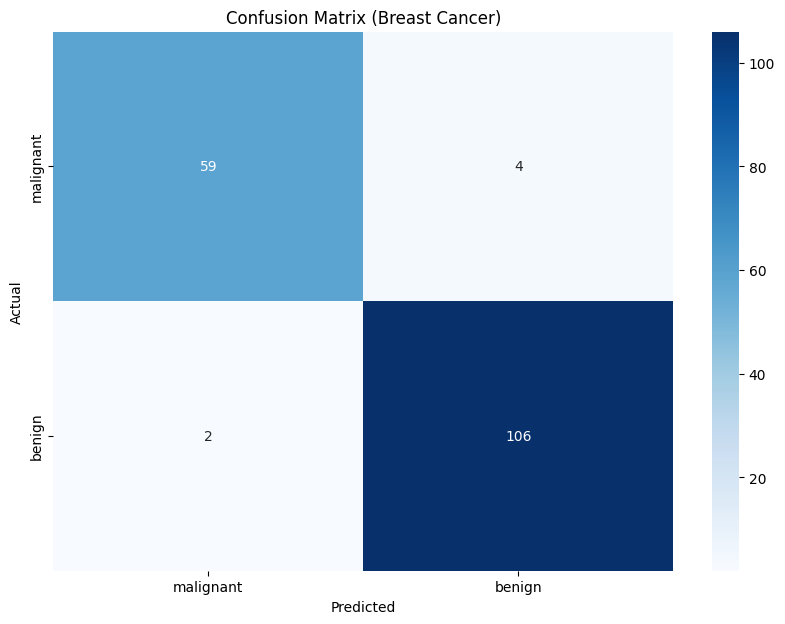

In [37]:
# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
cm_bc = confusion_matrix(y_test_bc, y_pred_bc)
sns.heatmap(cm_bc, annot=True, fmt='d', cmap='Blues', xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names)
plt.title('Confusion Matrix (Breast Cancer)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

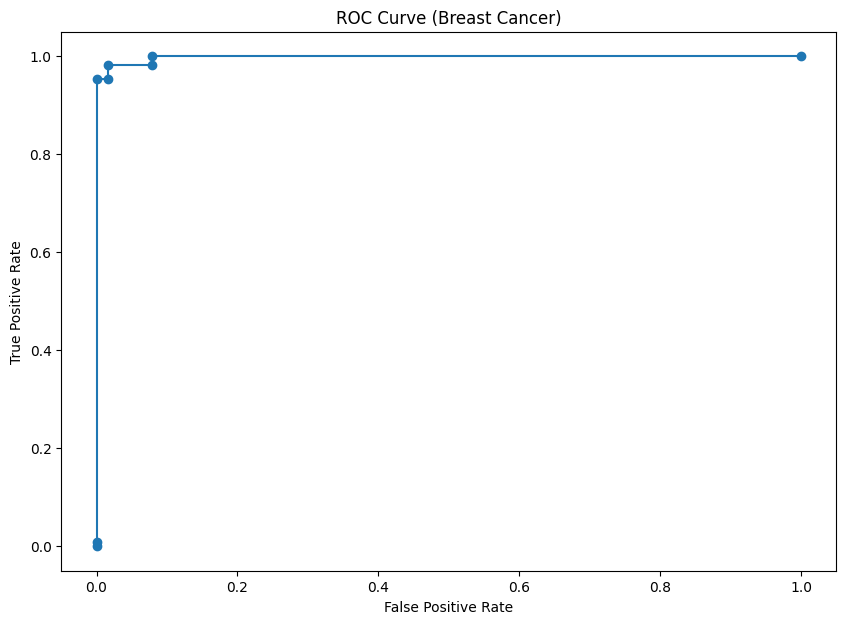

In [38]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test_bc, y_pred_prob_bc)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, marker='o')
plt.title('ROC Curve (Breast Cancer)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

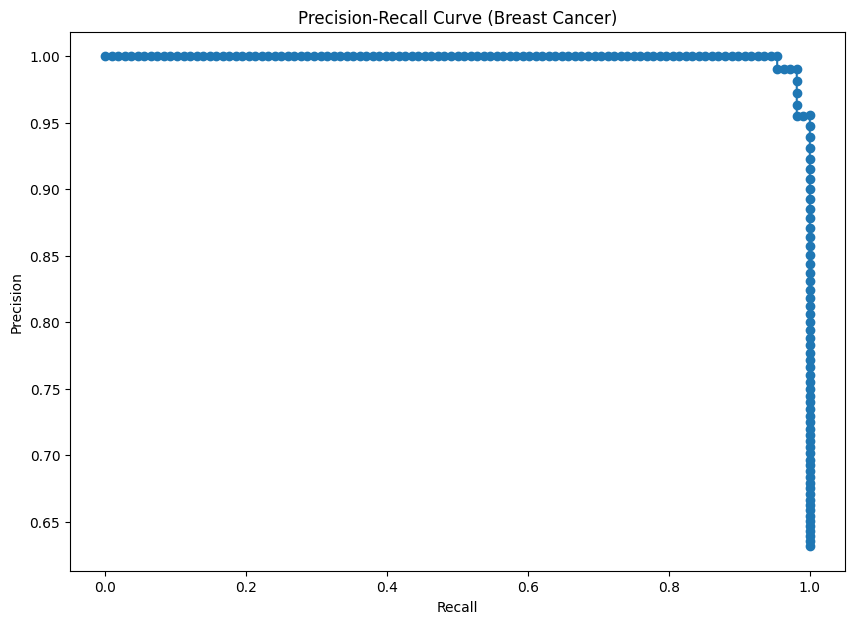

In [39]:
# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_bc, y_pred_prob_bc)
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='o')
plt.title('Precision-Recall Curve (Breast Cancer)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [40]:
# Load and prepare the Wine dataset for multiclass classification
wine = load_wine()
X_wine = wine.data
y_wine = wine.target


In [27]:
# Split the data into training and test sets
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)


In [28]:
# Train a Logistic Regression model for multiclass classification
model_wine = LogisticRegression(max_iter=200, multi_class='ovr')
model_wine.fit(X_train_wine, y_train_wine)
y_pred_wine = model_wine.predict(X_test_wine)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# Metrics for multiclass classification
print("\nMulticlass Classification Metrics (Wine Dataset):")
print("Confusion Matrix:")
print(confusion_matrix(y_test_wine, y_pred_wine))


Multiclass Classification Metrics (Wine Dataset):
Confusion Matrix:
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


In [41]:
print("\nClassification Report:")
report = classification_report(y_test_wine, y_pred_wine, target_names=wine.target_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()


Classification Report:


In [42]:
report_df

,precision,recall,f1-score,support
class_0,1.0,1.0,1.0,19.0
class_1,1.0,1.0,1.0,21.0
class_2,1.0,1.0,1.0,14.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,54.0
weighted avg,1.0,1.0,1.0,54.0


In [31]:
# For ROC-AUC, need to binarize the output
y_test_wine_bin = label_binarize(y_test_wine, classes=[0, 1, 2])
y_pred_prob_wine = model_wine.predict_proba(X_test_wine)
roc_auc_wine = roc_auc_score(y_test_wine_bin, y_pred_prob_wine, multi_class='ovr')
print(f"\nROC-AUC Score: {roc_auc_wine:.4f}")


ROC-AUC Score: 1.0000


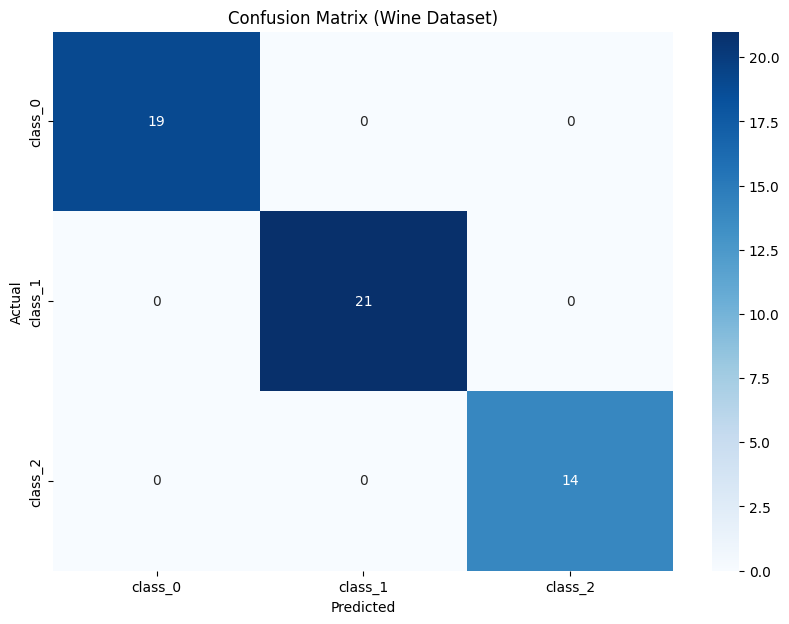

In [43]:
# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
cm_wine = confusion_matrix(y_test_wine, y_pred_wine)
sns.heatmap(cm_wine, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title('Confusion Matrix (Wine Dataset)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

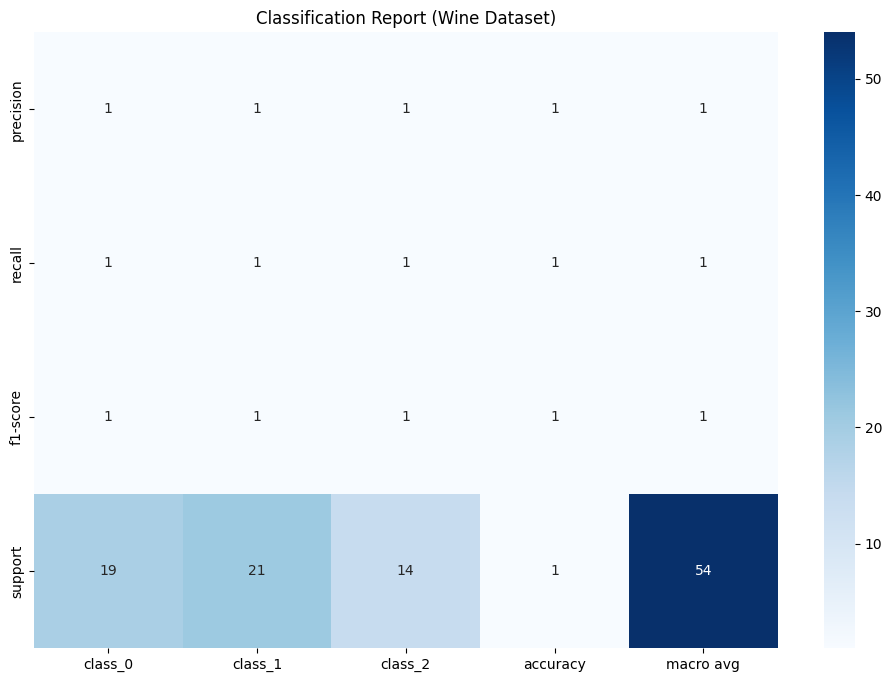

In [44]:
# Plot Classification Report
plt.figure(figsize=(12, 8))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report (Wine Dataset)')
plt.show()

Q5. Explain how logistic regression can be used for multiclass classification.

**Multinomial logistic regression** is an extension of **logistic regression** that addresses **multiclass classification problems**—those with more than two possible discrete outcomes. Here's how it works:

1. **Logistic Regression Basics**:
   - **Logistic regression** is primarily designed for **binary classification problems**, where the target variable has two classes (e.g., spam/not spam, yes/no).
   - It models the probability that an example belongs to the **positive class** (class 1) using a **binomial probability distribution function**.
   - The class labels are mapped to 1 (positive class) and 0 (negative class).

2. **Multiclass Classification**:
   - When dealing with more than two classes, standard logistic regression needs modification.
   - Common approaches include:
     - **One-vs-Rest (OvR)**: Splitting the multiclass problem into multiple binary classification problems (one for each class). Each subproblem compares one class against the rest.
     - **One-vs-One**: Creating a binary classifier for every pair of classes.
   - However, these approaches can be cumbersome and require multiple models.

3. **Multinomial Logistic Regression**:
   - Instead of transforming the problem, **multinomial logistic regression** directly predicts the **probability distribution** across all classes.
   - It changes the loss function to **cross-entropy loss** and predicts a **multinomial probability distribution**.
   - The model computes probabilities for each class and assigns the example to the class with the highest probability.
   - In Python, you can use libraries like **scikit-learn** to implement multinomial logistic regression¹³.

Remember, multinomial logistic regression is a powerful tool for handling multiclass classification tasks!

##Example with One-vs-Rest (OvR)


In [45]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load the iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model with OvR strategy
model = LogisticRegression(multi_class='ovr', max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9555555555555556
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



## Example with Multinomial Logistic Regression


In [46]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load the iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model with multinomial strategy
model = LogisticRegression(multi_class='multinomial', max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Q6. Describe the steps involved in an end-to-end project for multiclass classification.

An end-to-end project for multiclass classification typically involves several key steps. Here’s a general outline:

1. **Problem Definition**
   - **Understand the Problem:** Clearly define the classification task and the classes involved. Determine the business or research objectives.
   - **Specify Requirements:** Identify the metrics and success criteria for the classification model.

2. **Data Collection**
   - **Gather Data:** Collect the dataset relevant to the classification task. This might involve querying databases, scraping web data, or using existing datasets.
   - **Data Sources:** Ensure you have the necessary permissions and that the data sources are reliable.

3. **Data Preparation**
   - **Data Cleaning:** Handle missing values, outliers, and inconsistencies. Remove or correct erroneous data.
   - **Data Transformation:** Normalize or standardize features if necessary. Encode categorical variables into numerical formats (e.g., one-hot encoding).
   - **Feature Engineering:** Create new features or modify existing ones to improve model performance.

4. **Exploratory Data Analysis (EDA)**
   - **Visualize Data:** Use plots and charts to understand distributions, relationships, and patterns in the data.
   - **Statistical Analysis:** Perform statistical tests to gain insights into the data and assess correlations between features and target classes.

5. **Data Splitting**
   - **Train-Test Split:** Divide the dataset into training and testing subsets. Optionally, use cross-validation to ensure robust performance evaluation.
   - **Validation Set:** If needed, create a separate validation set for hyperparameter tuning.

6. **Model Selection**
   - **Choose Algorithms:** Select appropriate classification algorithms (e.g., logistic regression, decision trees, random forests, SVM, neural networks) based on the problem and data characteristics.
   - **Implement Models:** Use machine learning libraries (e.g., scikit-learn, TensorFlow, PyTorch) to build and train the models.

7. **Model Training**
   - **Train Models:** Fit the models to the training data, adjusting hyperparameters as needed.
   - **Monitor Performance:** Track metrics such as accuracy, precision, recall, F1 score, and confusion matrix during training.

8. **Model Evaluation**
   - **Evaluate Performance:** Assess the model’s performance on the test set using appropriate metrics.
   - **Analyze Results:** Check for class imbalances and interpret the model’s predictions and errors.

9. **Hyperparameter Tuning**
   - **Optimize Hyperparameters:** Use techniques like grid search or random search to find the best hyperparameters for the models.
   - **Validation:** Validate the tuned models to ensure they generalize well to new data.

10. **Model Deployment**
    - **Prepare for Deployment:** Convert the model into a production-ready format (e.g., export as a pickle file, use a model serving framework).
    - **Integrate with Systems:** Deploy the model into the target environment, integrating it with applications or services that will use the predictions.

11. **Monitoring and Maintenance**
    - **Monitor Performance:** Continuously track the model’s performance in production to detect issues or drifts in data.
    - **Update Model:** Retrain or update the model as needed based on new data or changes in requirements.

12. **Documentation and Reporting**
    - **Document Process:** Keep detailed records of the methods, models, parameters, and results.
    - **Report Findings:** Prepare and present reports to stakeholders, summarizing the project’s outcomes and impact.

Each step involves specific techniques and tools, so the details might vary depending on the project’s complexity and domain.

Q7. What is model deployment and why is it important?

**Model deployment** in the context of machine learning refers to integrating a trained model into a production environment where it can process inputs and generate outputs. Let's break down its importance:

1. **Enhancing Model Performance**: Deployment directly impacts a model's efficiency. By deploying it, you enable real-time predictions, allowing timely actions based on accurate insights¹².

2. **Ensuring Scalability**: As data volumes grow and demands shift, a deployed machine learning system must scale seamlessly without disruptions. Deployment ensures your model can handle increased workloads¹.

3. **Cost Implication**: Different deployment methods come with varying costs. Choosing the right approach balances performance and expenses¹.

4. **Security and Compliance**: Deployed models need robust security measures to protect sensitive data and comply with regulations¹.

5. **Flexibility and Versatility**: Deployment allows your model to adapt to changing requirements and integrate with existing infrastructure¹.

6. **Seamless Integration**: A deployed model becomes a practical tool, ready to make predictions on fresh, real-world data².

In summary, model deployment bridges the gap between development and practical use, making machine learning models valuable for decision-making and insights¹². 🚀



Q8. Explain how multi-cloud platforms are used for model deployment.

Certainly! Multi-cloud platforms involve using multiple public cloud providers to enhance flexibility, fault tolerance, and reliability. Here are some key deployment models:

1. **Mono Cloud**: Enterprises start with a single public or private cloud service provider (CSP) across the entire organization.
2. **Hybrid Cloud**: Applications run in combination with a public/private CSP and on-premises infrastructure. Sensitive workloads may stay on-premises, while less critical parts use public cloud providers.
3. **Polycloud**: Enterprises explore multiple public CSPs based on factors like feature fitment, cost, and service maturity.
4. **Multicloud**: Leveraging multiple public CSPs (e.g., Microsoft Azure, Amazon AWS, Google Cloud) to optimize workloads and achieve business objectives.
5. **Distributed Cloud**: Extending cloud services to edge locations for low-latency processing and data distribution¹.

In summary, multi-cloud strategies allow organizations to harness the strengths of different platforms, balancing performance, compliance, and cost considerations.



Q9. Discuss the benefits and challenges of deploying machine learning models in a multi-cloud
environment.

Deploying machine learning models in a multi-cloud environment can offer several benefits and challenges. Here’s a breakdown of each:

### Benefits:

1. **Avoid Vendor Lock-In**: By using multiple cloud providers, organizations can avoid being dependent on a single vendor, allowing more flexibility and negotiating power.

2. **Optimized Performance and Cost**: Different cloud providers may offer specialized services and pricing models that can be used to optimize performance and cost. For example, one provider might have better GPU availability, while another might offer more cost-effective storage solutions.

3. **Resilience and Redundancy**: Multi-cloud strategies can enhance system reliability and disaster recovery. If one provider experiences an outage, services can failover to another provider, ensuring continuity of operations.

4. **Regulatory Compliance**: Different regions and countries have varying regulations regarding data storage and processing. Multi-cloud environments allow organizations to place data in specific regions to comply with local regulations.

5. **Leveraging Unique Features**: Different cloud providers offer unique features and services (e.g., specialized AI tools, data management systems) that can be leveraged to enhance machine learning workflows.

### Challenges:

1. **Complexity in Management**: Managing resources across multiple cloud providers can be complex. It requires sophisticated orchestration, monitoring, and management tools to ensure seamless operation and integration.

2. **Data Integration and Consistency**: Ensuring consistent data access and integration across different cloud environments can be challenging. Data synchronization issues might arise, leading to potential discrepancies in model training and predictions.

3. **Increased Security Risks**: A multi-cloud environment can expand the attack surface, making it more challenging to secure data and applications. It requires robust security policies and practices to mitigate risks across different platforms.

4. **Cost Management**: While multi-cloud environments can optimize costs, they can also lead to unpredictable expenses due to different pricing models and potential hidden costs associated with data transfer and management.

5. **Interoperability Issues**: Different cloud providers use different tools, APIs, and standards. Ensuring that machine learning models and workflows work seamlessly across various platforms can require additional effort in terms of integration and customization.

6. **Performance Overheads**: Data transfer between cloud providers can introduce latency and performance overheads, which can impact the efficiency of machine learning workflows.

### Best Practices for Multi-Cloud Deployment:

- **Standardize Interfaces**: Use standardized APIs and tools to facilitate integration and interoperability across cloud providers.
- **Implement Robust Monitoring and Management Tools**: Employ tools that offer visibility and control across different cloud environments.
- **Adopt a Strong Security Framework**: Implement comprehensive security practices, including encryption, access controls, and regular audits.
- **Optimize Data Management**: Use data integration and synchronization tools to ensure consistent and accurate data across clouds.
- **Cost Monitoring**: Regularly monitor and analyze costs to prevent budget overruns and optimize resource usage.

Overall, while deploying machine learning models in a multi-cloud environment can offer significant benefits, it requires careful planning and management to address the associated challenges effectively.